In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Dropout
from sklearn.metrics import accuracy_score , confusion_matrix



In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


lebel

In [ ]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
123,6.3,2.7,4.9,1.8,2
136,6.3,3.4,5.6,2.4,2
68,6.2,2.2,4.5,1.5,1
73,6.1,2.8,4.7,1.2,1
99,5.7,2.8,4.1,1.3,1


input \ output

In [ ]:
x = df.drop('Class' , axis=1)
y = df['Class']

train \ test

In [ ]:
xtrain , xtest , ytrain , ytest =train_test_split(x , y ,test_size = 0.2 , random_state=42)

normalize

In [ ]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

one_hot encoding

In [ ]:
ytrain = keras.utils.to_categorical(ytrain , num_classes=3)
print(ytrain[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


ANN

In [ ]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(xtrain.shape[1], )))

model.add(Dense(units=32, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(xtrain , ytrain , epochs=30 , batch_size = 32)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2812 - loss: 1.1478
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4600 - loss: 1.0123
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4146 - loss: 1.0435
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4756 - loss: 0.9624
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5358 - loss: 0.9243
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6427 - loss: 0.8379
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7217 - loss: 0.8365
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7052 - loss: 0.7577
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6392 - loss: 0.8059
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7204 - loss: 0.7372
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8190 - loss: 0.6620
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6283
E

In [ ]:
prediction = model.predict(xtest)
print(prediction[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[7.7007443e-02 5.7024288e-01 3.5274962e-01]
 [9.8701024e-01 3.4452816e-03 9.5445830e-03]
 [9.1120554e-04 1.1147870e-01 8.8761008e-01]
 [7.5053796e-02 4.2507833e-01 4.9986786e-01]
 [3.5640851e-02 5.3205460e-01 4.3230453e-01]]


In [ ]:
prediction = model.predict(xtest)
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[1 0 2 2 1]


In [ ]:
le.inverse_transform(prediction[:5])

array([1, 0, 2, 2, 1])

In [ ]:
print(accuracy_score(ytest, prediction))

0.9333333333333333


In [ ]:
cm = confusion_matrix(ytest, prediction)
print(cm)

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


In [ ]:
le.classes_

array([0, 1, 2])

Text(50.722222222222214, 0.5, 'actual')

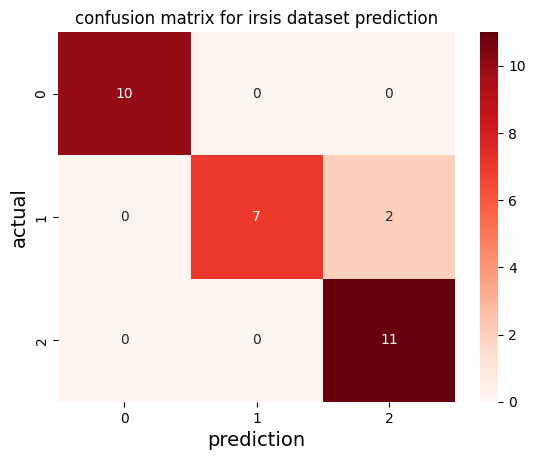

In [ ]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)